# Homework 3 (due 20th November, 11:59 PM)

1.  Use Iris dataset with only two features, namely petal length (cm) and petal width (cm).
2.  Convert your data into a two-class dataset, such that Virginica (class=2) will be one class and Setosa and Versicolor (class=1 and class=0) samples will constitute the other class. (Note: represent both of those classes as a single class)
3.  Get your new dataset ready to be fed into the provided plot_2d_examples function. (Check week 8 lecture ipynb file and library documentation.)
4.  Using plot_2d_examples function, evaluate (plot side-by-side) different SVM classifiers with **polynomial kernels of varying degrees**. Also, try several **$C$** values.


You should be able to get some figures like this:

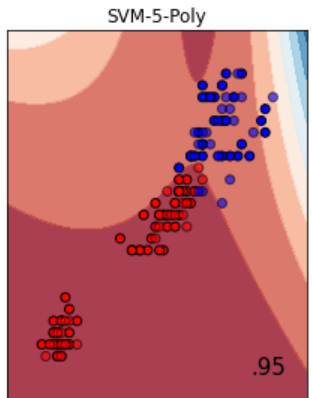

5.  Do not separate the train/test sets by yourselves, just feed into plot_2d_examples. It has its own split inside. Also it prints test set scores on the bottom right corner of each figure. According to these scores, which (degree,$C$) pair produced the best results? Please indicate your answer explicitly.
6.  Also comment on $C$ values. Which $C$ value range is reasonable do you think? After which value, it looks like an overfit?

**Important Note: Write your answers to Q5 and Q6 as two different markdown cell in Jupyter Notebook under your figures.**

In [1]:
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics.pairwise import polynomial_kernel
from sklearn import datasets
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC

In [2]:
data_iris = datasets.load_iris()
data_iris = pd.DataFrame(data=np.c_[data_iris['data'], data_iris['target']],columns= list(data_iris['feature_names']) + ['target'])
data_iris = pd.DataFrame(data_iris[['petal length (cm)','petal width (cm)','target']])
data_iris = data_iris.replace(0, 1) # I took it from https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html
data_iris

,petal length (cm),petal width (cm),target
0,1.4,0.2,1.0
1,1.4,0.2,1.0
2,1.3,0.2,1.0
3,1.5,0.2,1.0
4,1.4,0.2,1.0
...,...,...,...
145,5.2,2.3,2.0
146,5.0,1.9,2.0
147,5.2,2.0,2.0
148,5.4,2.3,2.0


In [3]:
def plot_2d_examples(classifiers, names, datasets, figsize=(27,9), h = .02):
  """
  Here we define a helper method. We want to make a lot of visualizations, so lets 
  organize the visualization code into a method we can re-use. 
  - classifiers is a list of scikit-learn classifier objects
  - names is a list of strings corresponding to each classifier in 'classifiers'. As such they should have the same length
  - datasets will be a list of 2D datasets, each being a tuple of (X, y)
  - h is the step size of the mesh. Smaller sizes show more detail
  """
  figure = plt.figure(figsize=figsize)
  i = 1
    
  # iterate over datasets
  for ds_cnt, ds in enumerate(datasets):
      # preprocess dataset, split into training and test part
      
      X, y = ds
      X = StandardScaler().fit_transform(X)
      X_train, X_test, y_train, y_test = \
          train_test_split(X, y, test_size=.4, random_state=42)

      x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
      y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
      xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                           np.arange(y_min, y_max, h))

      # just plot the dataset first
      cm = plt.cm.RdBu
      cm_bright = ListedColormap(['#FF0000', '#0000FF'])
      ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
      if ds_cnt == 0:
          ax.set_title("Input data")
      # Plot the training points
      ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                 edgecolors='k')
      # Plot the testing points
      ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.3,
                 edgecolors='k')
      ax.set_xlim(xx.min(), xx.max())
      ax.set_ylim(yy.min(), yy.max())
      ax.set_xticks(())
      ax.set_yticks(())
      i += 1

      # iterate over classifiers
      for name, clf in zip(names, classifiers):
          ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
          clf.fit(X_train, y_train)
          score = clf.score(X_test, y_test)

          # Plot the decision boundary. For that, we will assign a color to each
          # point in the mesh [x_min, x_max]x[y_min, y_max].
          if hasattr(clf, "decision_function"):
              Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
          else:
              Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

          # Put the result into a color plot
          Z = Z.reshape(xx.shape)
          ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

          # Plot the training points
          ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                     edgecolors='k')
          # Plot the testing points
          ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                     edgecolors='k', alpha=0.3)

          ax.set_xlim(xx.min(), xx.max())
          ax.set_ylim(yy.min(), yy.max())
          ax.set_xticks(())
          ax.set_yticks(())
          if ds_cnt == 0:
              ax.set_title(name)
          ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                  size=15, horizontalalignment='right')
          i += 1

  plt.tight_layout()
  plt.show()

In [4]:
X = data_iris[data_iris.columns[0:2]]
y = data_iris ['target']
dataset=[(X,y)]

In [5]:
def plot2d(coef):
    classifiers = []
    names = []
    X = data_iris[data_iris.columns[0:2]]
    y = data_iris['target']
    dataset=[(X,y)]
    for i in [1, 2, 3, 5, 9, 30]:
      classifiers.append(SVC(kernel='poly', degree=i, gamma='scale', coef0 = coef))
      names.append("SVM-"+str(i)+"-Poly")
    plot_2d_examples(classifiers, names, dataset, figsize=(20,5))

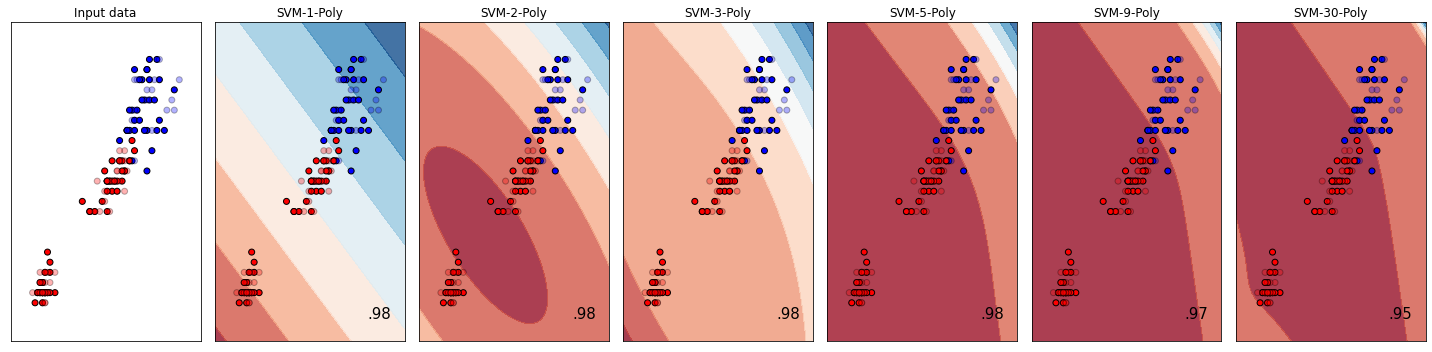

In [6]:
plot2d(0.2)

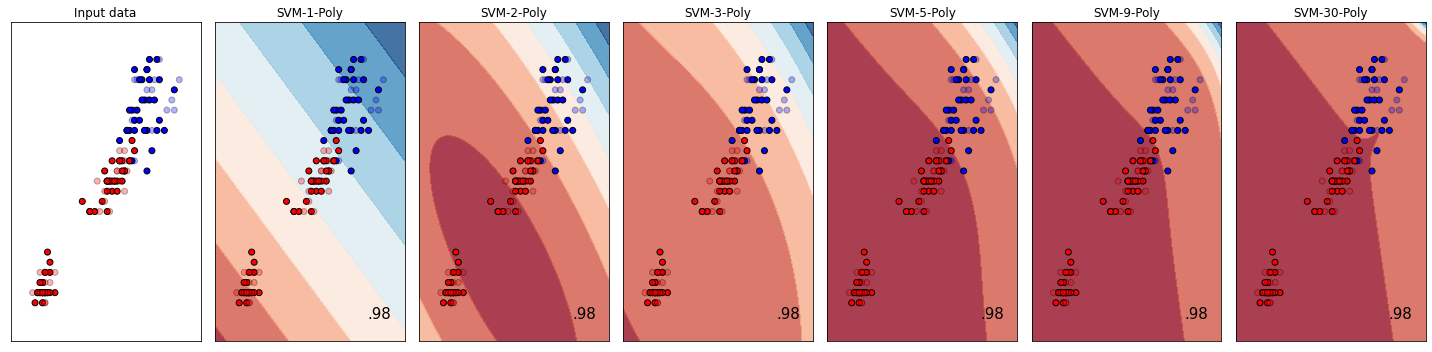

In [7]:
plot2d(0.5)

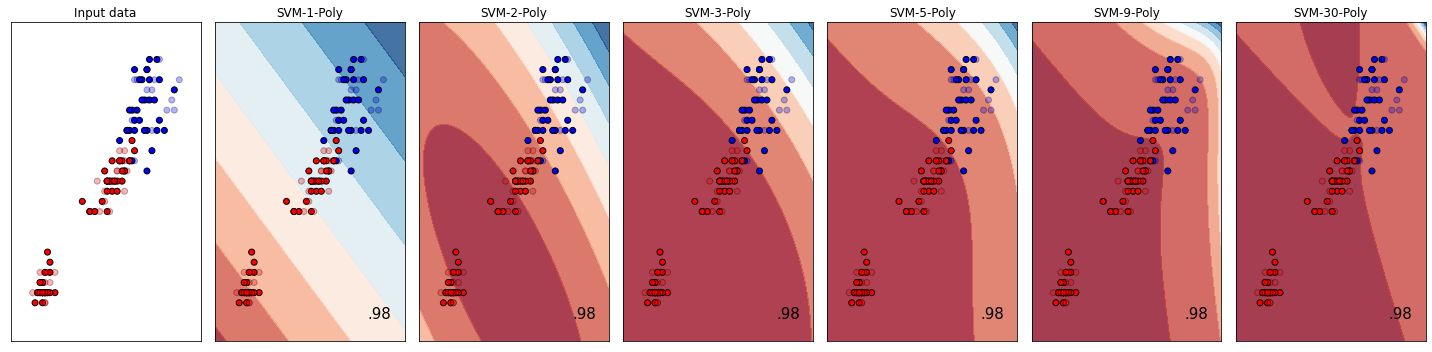

In [8]:
plot2d(0.8)

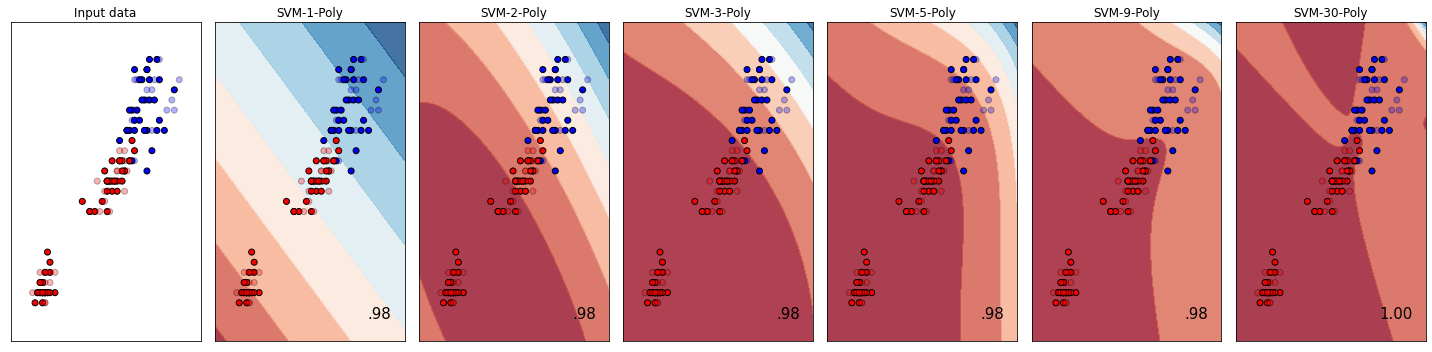

In [9]:
plot2d(1)

In [ ]:
# According to my opinion the best choice of values of the C is 0.2 . Because For c = 0.2 the shape is better than other C values.